## IMPORTACIÓN DE LIBRERIAS NECESARIAS ##

In [1]:
import pandas as pd
import zipfile
import imageio as iio
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from collections import Counter
import plotly.express as px
import re

%matplotlib inline

## EXTRACCIÓN/CARGA DE DATOS 

In [2]:
# Asignamos a una variable la ruta donde se encuentra el archivo zip con el dataset que vamos a trabjar
# Asignamos a otra variable el directorio donde queremos que guarde el dataset extraido de ese archivo zip

path_to_zip_file = '../data/dataset_shark_attack.zip'
directory_to_extract_to = '../data'

In [23]:
# Con esta función de esta libreria importada extraemos el contenido en el zip y lo guardamos en el dorecotrio antes asignado

with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
    #zip_ref.extractall(directory_to_extract_to)

In [3]:
# Asiganmos a una nueva variable el contenido del dataset, en este caso un archivo csv
# Guardamos en otra variable los datos decodificados con una función de pandas para empezar a trabjar con ellos en python

path_dataset = '/Users/antoineambros/Documents/proyectos/shark_attacks/data/attacks.csv'
data = pd.read_csv(path_dataset, encoding='latin1')

## EXPLORACIÓN DE DATOS

### Conocer información básica

In [9]:
print('Cantidad de Filas y columnas:',data.shape)

Cantidad de Filas y columnas: (25723, 24)


In [10]:
print(f'COLUMNAS DEL DATASET: {data.columns.values}')

COLUMNAS DEL DATASET: ['Case Number' 'Date' 'Year' 'Type' 'Country' 'Area' 'Location' 'Activity'
 'Name' 'Sex' 'Age' 'Injury' 'Fatal' 'Time' 'Species'
 'Investigator or Source' 'pdf' 'href formula' 'href' 'Case Number.1'
 'Case Number.2' 'original order' 'Unnamed: 22' 'Unnamed: 23']


In [ ]:
# Veamos el tipo de datos. Un vistazo preliminar del contenido del dataset

data.head()

In [5]:
# Aqui podremos ver los tipos de datos que vamos a manejar, si hay muchos datos 'nulos' en el dataset

data.info()

In [15]:
data.isnull().sum()

Case Number               17021
Date                      19421
Year                      19423
Type                      19425
Country                   19471
Area                      19876
Location                  19961
Activity                  19965
Name                      19631
Sex                       19986
Age                       22252
Injury                    19449
Fatal                     19960
Time                      22775
Species                   22259
Investigator or Source    19438
pdf                       19421
href formula              19422
href                      19421
Case Number.1             19421
Case Number.2             19421
original order            19414
Unnamed: 22               25722
Unnamed: 23               25721
dtype: int64

#### Con la siguiente función vamos a ver cómo son los datos de los que se componen cada una de las variables que tenemos en el DataSet

In [13]:
for i in data.columns:
    print(str(i) + ':' + str(data[i].unique()) + '\n' )

Case Number:['2018.06.25' '2018.06.18' '2018.06.09' ... 'ND.0001' '0' 'xx']

Date:['25-Jun-2018' '18-Jun-2018' '09-Jun-2018' ... '1883-1889' '1845-1853' nan]

Year:[2018. 2017.   nan 2016. 2015. 2014. 2013. 2012. 2011. 2010. 2009. 2008.
 2007. 2006. 2005. 2004. 2003. 2002. 2001. 2000. 1999. 1998. 1997. 1996.
 1995. 1984. 1994. 1993. 1992. 1991. 1990. 1989. 1969. 1988. 1987. 1986.
 1985. 1983. 1982. 1981. 1980. 1979. 1978. 1977. 1976. 1975. 1974. 1973.
 1972. 1971. 1970. 1968. 1967. 1966. 1965. 1964. 1963. 1962. 1961. 1960.
 1959. 1958. 1957. 1956. 1955. 1954. 1953. 1952. 1951. 1950. 1949. 1948.
 1848. 1947. 1946. 1945. 1944. 1943. 1942. 1941. 1940. 1939. 1938. 1937.
 1936. 1935. 1934. 1933. 1932. 1931. 1930. 1929. 1928. 1927. 1926. 1925.
 1924. 1923. 1922. 1921. 1920. 1919. 1918. 1917. 1916. 1915. 1914. 1913.
 1912. 1911. 1910. 1909. 1908. 1907. 1906. 1905. 1904. 1903. 1902. 1901.
 1900. 1899. 1898. 1897. 1896. 1895. 1894. 1893. 1892. 1891. 1890. 1889.
 1888. 1887. 1886. 1885. 1884. 18

In [8]:
# Mediante esta función podemos ver datos aleatorios de nuestra estructura, y hacernos una idea de lo que tenemos

data.sample(3)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
2189,1998.05.16.c,16-May-1998,1998.0,Unprovoked,USA,Florida,"Pecks Lake, Martin County",Swimming,Janelle Dickinson,F,...,"1.8 m [6'] shark, possibly a blacktip","The Stuart (FL) News, 5/17/1998",1998.05.16.c-Dickinson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1998.05.16.c,1998.05.16.c,4114.0,NaN,NaN
20041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15531,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Aqui si nos fijamos bien, no todas las columnas están bien escritas, o no aportan nada porque solamente contienen valores NaN, como en el caso de "Unnamed: 22" y "Unnamed: 23",  y eso nos puede llevar a errores mas adelante. Así que vamos a mofificar y eliminar las variables que no nos vayan a hacer falta o no aporten ningún valor al estudio.

In [256]:
# Tenemos dos columnas con un espacio al final y otra con paréntesis, mayúsculas... Vamos a renombrarlas

print('Nombre columnas:',data.columns)

### Arreglamos eso:

In [4]:
data.rename(columns = {'Sex ':'Sex'}, inplace = True)
data.rename(columns = {'Species ':'Species'}, inplace = True)
data.rename(columns = {'Fatal (Y/N)':'Fatal'}, inplace = True)

## Ahora comprobamos los países donde se dan mas casos de ataques de tiburones. El Top 5.

In [5]:
country = data['Country']
Counter(country).most_common(5)

[(nan, 19471),
 ('USA', 2229),
 ('AUSTRALIA', 1338),
 ('SOUTH AFRICA', 579),
 ('PAPUA NEW GUINEA', 134)]

In [6]:
country = country.dropna()
top_country = dict(Counter(country).most_common(5))
y_count= (top_country.keys())
x_count= top_country.values()
y_pos_count = np.arange(len(y_count))

Text(0.5, 1.0, 'Países con mayor número de casos')

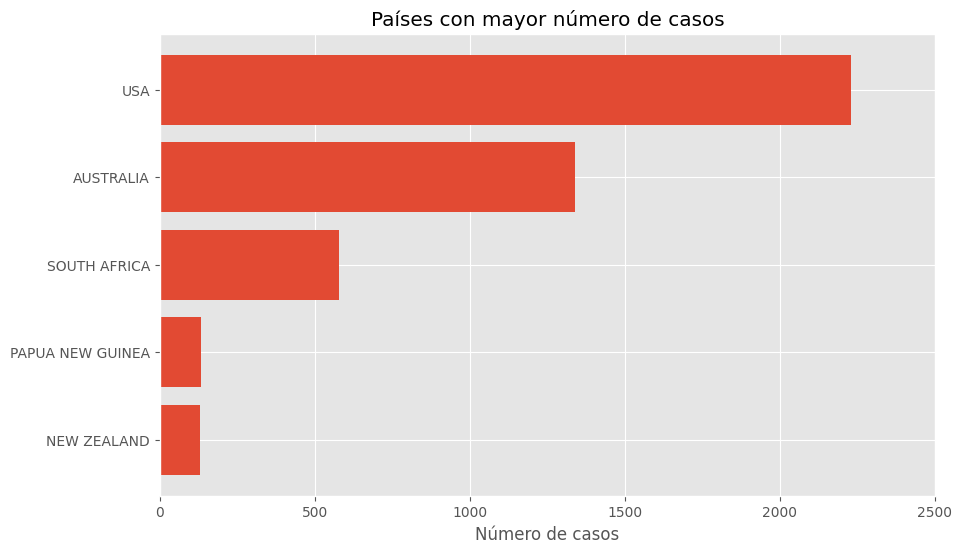

In [11]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [10, 6]
fig, ax = plt.subplots()
ax.barh(y_pos_count, x_count, align='center')
ax.set_yticks(y_pos_count)
ax.set_yticklabels(y_count)
ax.invert_yaxis()  
ax.set_xlabel('Número de casos')
ax.set(xlim=[0, 2500])
ax.set_title('Países con mayor número de casos')

### El País que vamor a centrar nuestro análisis exploratorio será USA

In [7]:
# Vamos a filtrar el dataset por el país con el que nos vamos a quedar para el análisis

country = 'USA'
df_country_filtered = data[data['Country'] == country]

count_num_country_filtered = len(df_country_filtered)
print(f'Los número de registros de ataques de tiburón en {country} son {count_num_country_filtered}')

Los número de registros de ataques de tiburón en USA son 2229


# Limpieza de Nulos

In [259]:
# Aqui vamos ha hacer un conteo de datos nulos en el nuevo dataset con los datos filtrados por el país elegido. USA

df_country_filtered.isnull().sum()

### Vamos a crear una función que nos permita visualizar mejor las columnas que contienen más datos nulos mediante una gráfica

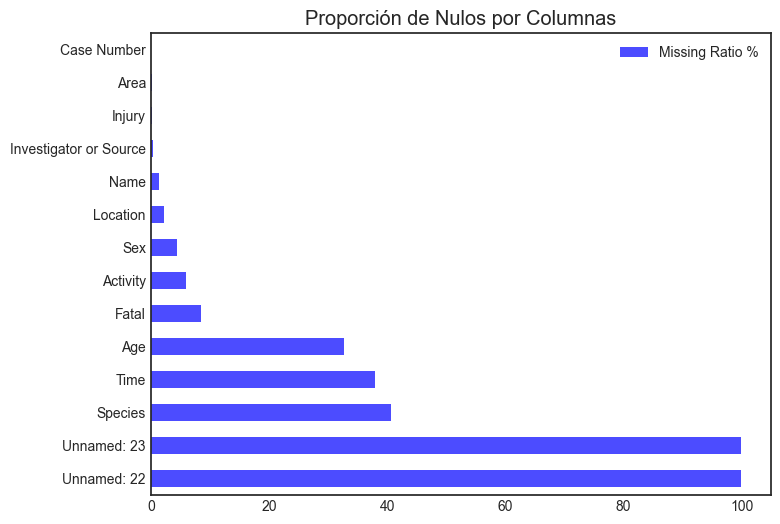

In [16]:
plt.style.use("seaborn-white")

def plot_nas(df: pd.DataFrame):
    if df.isnull().sum().sum() != 0:
        na_df = (df.isnull().sum() / len(df)) * 100      
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
        missing_data.plot(kind = "barh", title="Proporción de Nulos por Columnas", color='blue', alpha=0.7, figsize=(8, 6))
        plt.show()
    else:
        print('No Nas found')
plot_nas(df_country_filtered)

## Conteo de valores únicos de las variables que nos interesan

In [9]:
dates_cunts = dict(df_country_filtered['Date'].value_counts())
ages_counts = dict(df_country_filtered['Age'].value_counts())
year_counts = dict(df_country_filtered['Year'].value_counts())
activity_counts = dict(df_country_filtered['Activity'].value_counts())
fatal_counts = dict(df_country_filtered['Fatal'].value_counts())
sex_counts = dict(df_country_filtered['Sex'].value_counts())
species_counts = dict(df_country_filtered['Species'].value_counts())

### Vemos su estrucruta en forma de diccionario. Nos ayudará a visualizar de qué forma vamos a limpiar, sustituir valores, y sacar lo que nos interese cómo nos interese.

In [260]:
dates_cunts

In [261]:
dates_cunts, ages_counts, year_counts, activity_counts, fatal_counts, sex_counts, species_counts

### Borramos las columnas que no nos interesan para el estudio, haciendo una copia para que no perder es dataset original

In [73]:
data_USA = df_country_filtered.copy()

drop_columns = ['Unnamed: 22',
         'Unnamed: 23',
         'Case Number',
         'Name',
         'Investigator or Source',
         'pdf',
         'href formula',
         'href',
         'Case Number.1',
         'Case Number.2',
         'Injury',
         'original order',
         'Time',
         'Location',
         'Area',
         'Type']
         

data_USA.drop(drop_columns, axis=1, inplace=True)

In [262]:
data_USA

### Completamos y corregimos datos de los campos donde no tenemos información de cada una de nuestras columnas.

In [85]:
data_USA["Sex"].fillna('Unknown', inplace = True)
data_USA['Fatal'].fillna('UNKNOWN', inplace = True)
data_USA['Activity'].fillna('UNKNOWN', inplace = True)
data_USA['Date'].fillna('UNKNOWN', inplace = True)
data_USA['Species'].fillna('UNKNOWN', inplace = True)
data_USA['Age'].fillna('UNKNOWN', inplace = True)
data_USA['Year'].fillna('UNKNOWN' , inplace = True)

In [54]:
data_USA

### Corregimos valores y los ajustamos para poder trabajarlos

In [86]:
data_USA = data_USA.replace({'Sex':{'M ':'M','N':'M','lli':'F'}})
data_USA = data_USA.replace({'Year':{0.0:1962}})
data_USA = data_USA.replace({'Age':{'Teen':'UNKNOWN',
                         'teen':'UNKNOWN',
                         '30s':'UNKNOWN',
                         '20s':'UNKNOWN',
                         ' 43':'UNKNOWN',
                         'Elderly':'UNKNOWN',
                         'mid-20s':'UNKNOWN',
                         'Ca. 33':'UNKNOWN',
                         'adult':'UNKNOWN',
                         '21 or 26':'UNKNOWN',
                         '10 or 12':'UNKNOWN',
                         '9 & 12':'UNKNOWN',
                         '37, 67, 35, 27,  ? & 27':'UNKNOWN',
                         '9 & 12':'UNKNOWN',
                         '?    &   14':'UNKNOWN',
                         "60's":'UNKNOWN',
                         "\\xa0 ":'UNKNOWN',
                         " 28'":'UNKNOWN',
                         "7      &    31":'UNKNOWN',
                         "23 & 20":'UNKNOWN',
                         "mid-30s":'UNKNOWN',
                         "6½":'UNKNOWN',
                         "Teens":'UNKNOWN',
                         "12 or 13":'UNKNOWN',
                         "50s":'UNKNOWN',
                         "60s":'UNKNOWN',
                         "young":'UNKNOWN'}})
data_USA = data_USA.replace({'Fatal':{' N':'N','N ':'N'}})

### Creamos nuestro nuevo DataFrame reseteando los índices, para tenerlo ya con las columnas seleccionadas para nuestro estudio. Ahora ya están filtradas, limpias y corregidos errorer

In [87]:
data_USA = data_USA.reset_index()
data_USA.drop(['index'], axis=1 , inplace=True)

In [263]:
data_USA.isnull().sum()

In [264]:
data_USA.info()

In [59]:
data_USA = data_USA.astype({'Year':'int'})

In [33]:
data_USA['Year'].unique()

### En este gráfico se muestra la cantidad de ataques de tuburones en USA desde que se tienen registros.

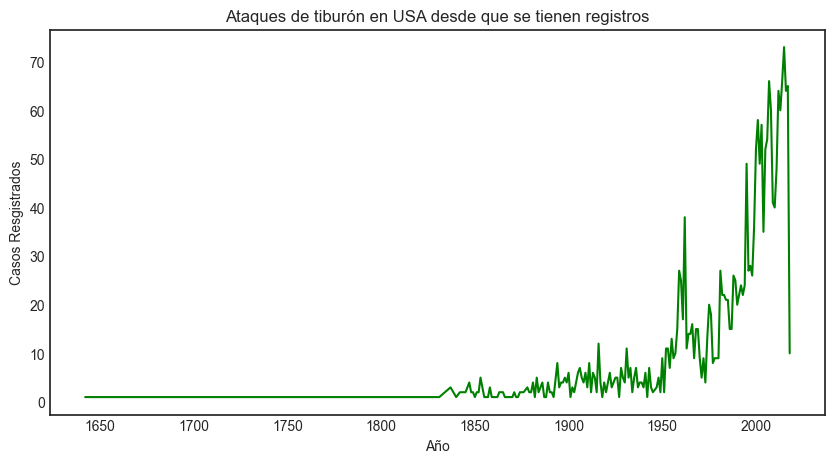

In [38]:
year_attack = data_USA[data_USA['Year'] >= 1642]

year_attack = year_attack.groupby('Year')['Date'].count().reset_index()

plt.style.use("seaborn-white")
year_attack.plot(kind='line', x= "Year", y= "Date", title= "Ataques de tiburón en USA desde que se tienen registros", legend=False, linestyle='-', color='g', figsize=(10, 5))
plt.xlabel('Año')
plt.ylabel('Casos Resgistrados')
#fig = px.line(year_attack, x='Year', y='Date', title='Ataques de tiburón por año en USA')


plt.show()

### Aqui vamos a mostrar los ataques registrados en USA entre 2002 y 2018, siendo este último año, del último que se tienen registros

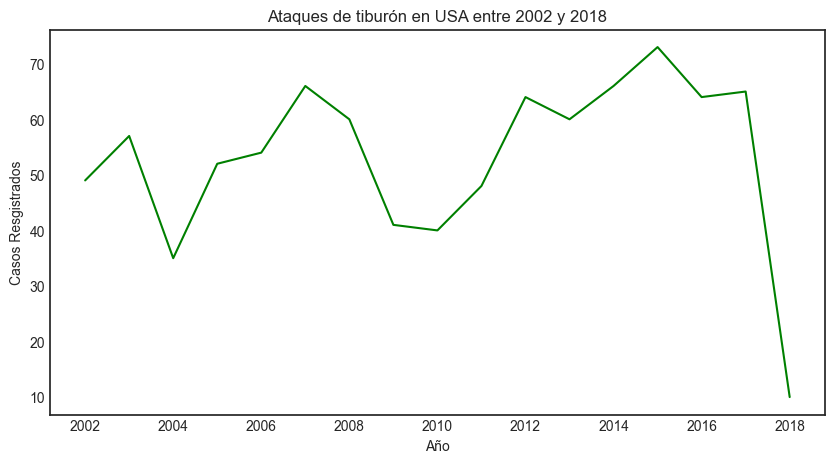

In [40]:
year_attack2 = data_USA[data_USA['Year'] >= 2002]

year_attack2 = year_attack2.groupby('Year')['Date'].count().reset_index()
plt.style.use("seaborn-white")
year_attack2.plot(kind='line', x= "Year", y= "Date", title= "Ataques de tiburón en USA entre 2002 y 2018", legend=False, linestyle='-', color='g', figsize=(10, 5))
plt.xlabel('Año')
plt.ylabel('Casos Resgistrados')

plt.show()

## Visualización de ataques de tiburón en USA según el género

In [265]:
data_USA['Sex'].value_counts()

In [78]:
data_USA.loc[data_USA['Sex'].str.contains("M"), 'Sex'] = "Hombres"

In [79]:
data_USA.loc[data_USA['Sex'].str.contains("F"), 'Sex'] = "Mujeres"

In [266]:
Sex_count = data_USA['Sex'].value_counts().reset_index().rename(columns={'index':'Gender','Sex':'Count'})

Sex_count

## Gráfica sobre la Propoción de Hombres, Mujeres y Sin Especificar, de casos de ataques de tiburones en USA.

In [189]:
fig = px.pie(data_frame = Sex_count,
             values = 'Count',
             names = 'Gender',
             title = 'Ataques de Tiburón por Género en USA',
             color_discrete_sequence=px.colors.qualitative.Set2
             )

In [190]:
fig.update_traces(textposition ='outside',
                  textinfo = 'label+percent')
fig.update_layout(paper_bgcolor='moccasin',
                  legend_title = 'Género',
                  font = dict(
                      family = "Helvetica",
                      size = 18,
                      color = 'black'
                  ))

fig.show()

## Vamos a mostrar ahora las proporciones de muertes y de supervivientes a los ataques por tiburones en USA

In [267]:
data_USA['Fatal'].value_counts()

In [130]:
data_USA.loc[data_USA['Fatal'] == "N", 'Fatal'] = 'NO'

In [131]:
data_USA.loc[data_USA['Fatal'] == "Y", 'Fatal'] = 'SI'

In [268]:
Fatal_count = data_USA['Fatal'].value_counts().reset_index().rename(columns = {'Fatal':'Count','index':'Status'})
Fatal_count

In [210]:
fig2 = px.pie(data_frame = Fatal_count,
             values = 'Count',
             names = 'Status',
             title = '¿Sobrevivió?',
             color_discrete_sequence=px.colors.qualitative.Set1
             )

In [211]:
fig2.update_traces(textposition ='outside',
                  textinfo = 'label+percent')
fig2.update_layout(paper_bgcolor='navajowhite',
                  legend_title = 'Estado',
                  font = dict(
                      family = "Helvetica",
                      size = 18,
                      color = 'black'
                  ))

fig2.show()

## Aqui vamos a ver de forma gráfica el TOP 5 de los tiburones que más ataques han provocado en USA

In [269]:
data_USA['Species'].value_counts()

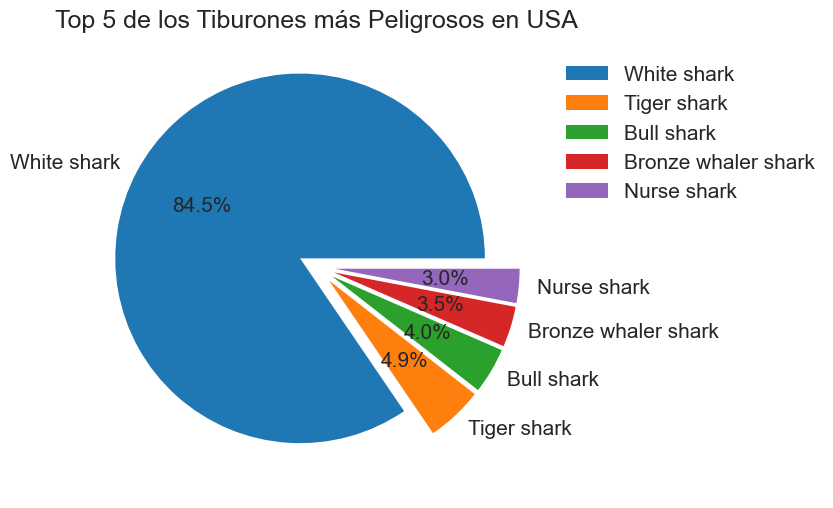

In [270]:
shark5 = data_USA.groupby(['Species'], as_index=False).size()

shark5 = shark5.sort_values(by=['size'], ascending=False)

shark5 = shark5[0:5]

mlabels=['White shark','Tiger shark','Bull shark','Bronze whaler shark', 'Nurse shark']

plt.pie(shark5['size'],labels=mlabels, explode = (0.1,0.1,0.1,0.1,0.1), autopct='%1.1f%%')

plt.title('Top 5 de los Tiburones más Peligrosos en USA', loc='center')

fig = plt.gcf()

fig.set_size_inches(8,6)

plt.legend(bbox_to_anchor=(1,0.6), loc="lower left")

plt.show()
                          